In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FuncFormatter

# Load & Prep

Source: https://www.bfs.admin.ch/bfs/de/home/statistiken/katalog.assetdetail.16484444.html

In [ ]:
csv_path = "data/ts-x-21.03.01.csv"
df = pd.read_csv(csv_path, sep=";", encoding="utf-8-sig")

In [137]:
required_cols = {"INDICATORS", "REGION", "VALUE"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Fehlende Spalten im CSV: {missing}. Verfügbar: {list(df.columns)}")

In [138]:
wanted_inds = {"Ind_01_01", "Ind_01_03", "Ind_06_03", "Ind_06_07"}

# Subsets für INDICATOR

In [139]:
# Subsets für Ind_01_01 und Schweiz-Aggregat ausschließen
df_01_01 = df.loc[df["INDICATORS"] == "Ind_01_01"].copy()
df_01_01["REGION"] = df_01_01["REGION"].astype(str).str.strip()
df_01_01 = df_01_01.loc[df_01_01["REGION"] != "Schweiz"].copy()
df_01_01["VALUE_num"] = pd.to_numeric(
    df_01_01["VALUE"].astype(str).str.replace(",", ".", regex=False).str.strip(),
    errors="coerce"
)


# Subsets für Ind_01_03 und Schweiz-Aggregat ausschließen
df_01_03 = df.loc[df["INDICATORS"] == "Ind_01_03"].copy()
df_01_03["REGION"] = df_01_03["REGION"].astype(str).str.strip()
df_01_03 = df_01_03.loc[df_01_03["REGION"] != "Schweiz"].copy()
df_01_03["VALUE_num"] = pd.to_numeric(
    df_01_03["VALUE"].astype(str).str.replace(",", ".", regex=False).str.strip(),
    errors="coerce"
)


# Subsets für Ind_06_03 und Schweiz-Aggregat ausschließen
df_06_03 = df.loc[df["INDICATORS"] == "Ind_06_03"].copy()
df_06_03["REGION"] = df_06_03["REGION"].astype(str).str.strip()
df_06_03 = df_06_03.loc[df_06_03["REGION"] != "Schweiz"].copy()
df_06_03["VALUE_num"] = pd.to_numeric(
    df_06_03["VALUE"].astype(str).str.replace(",", ".", regex=False).str.strip(),
    errors="coerce"
)

# Subsets für Ind_06_07 und Schweiz-Aggregat ausschließen
df_06_07 = df.loc[df["INDICATORS"] == "Ind_06_07"].copy()
df_06_07["REGION"] = df_06_07["REGION"].astype(str).str.strip()
df_06_07 = df_06_07.loc[df_06_07["REGION"] != "Schweiz"].copy()
df_06_07["VALUE_num"] = pd.to_numeric(
    df_06_07["VALUE"].astype(str).str.replace(",", ".", regex=False).str.strip(),
    errors="coerce"
)



# Explorative Analyse

## Ind_01_01: Bevölkerung absolut

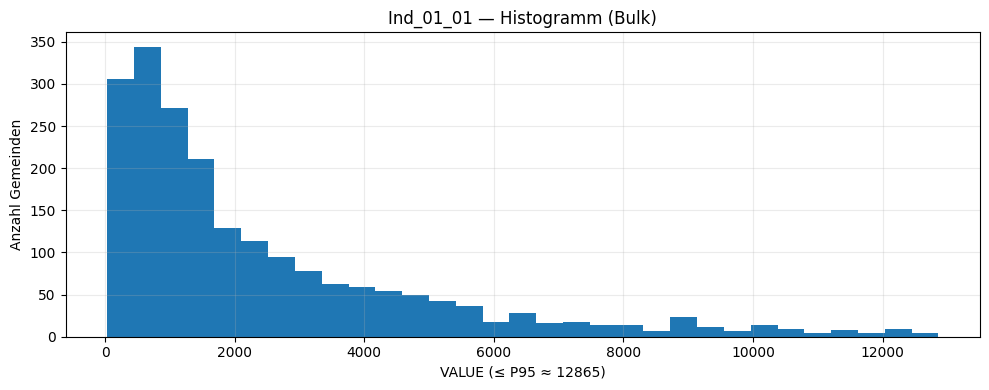

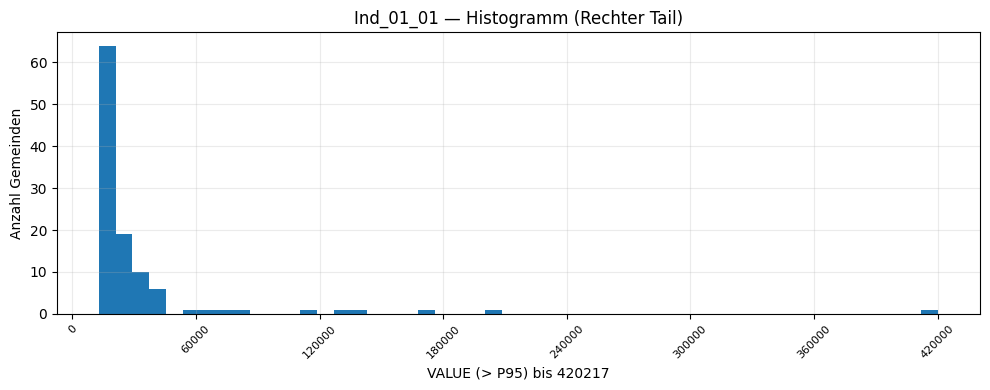

In [140]:
vals = df_01_01["VALUE_num"].dropna().values
p95 = np.percentile(vals, 95)
left = vals[vals <= p95]
right = vals[vals > p95]

# Bins für left (Freedman–Diaconis)
if len(left) < 2:
    bins_left = 5
else:
    q1_left, q3_left = np.percentile(left, [25, 75])
    iqr_left = q3_left - q1_left
    if iqr_left == 0:
        bins_left = int(np.clip(np.ceil(np.log2(len(left)) + 1), 5, 50))
    else:
        h_left = 2 * iqr_left * (len(left) ** (-1/3))
        bins_left = int(np.clip(np.ceil((left.max() - left.min()) / h_left), 5, 50))

# Bins für right (Freedman–Diaconis)
if len(right) < 2:
    bins_right = 5
else:
    q1_right, q3_right = np.percentile(right, [25, 75])
    iqr_right = q3_right - q1_right
    if iqr_right == 0:
        bins_right = int(np.clip(np.ceil(np.log2(len(right)) + 1), 5, 50))
    else:
        h_right = 2 * iqr_right * (len(right) ** (-1/3))
        bins_right = int(np.clip(np.ceil((right.max() - right.min()) / h_right), 5, 50))

# Plot 1: Bulk
fig1, ax1 = plt.subplots(figsize=(10, 4))
ax1.hist(left, bins=bins_left)
ax1.set_xlabel(f"VALUE (≤ P95 ≈ {p95:.0f})")
ax1.set_ylabel("Anzahl Gemeinden")
ax1.set_title("Ind_01_01 — Histogramm (Bulk)")
ax1.grid(alpha=0.25)
ax1.xaxis.set_major_locator(MaxNLocator(nbins=8, prune="both"))
plt.tight_layout()
plt.show()

# Plot 2: Tail
fig2, ax2 = plt.subplots(figsize=(10, 4))
if len(right) > 0:
    ax2.hist(right, bins=bins_right)
ax2.set_xlabel(f"VALUE (> P95) bis {vals.max():.0f}")
ax2.set_ylabel("Anzahl Gemeinden")
ax2.set_title("Ind_01_01 — Histogramm (Rechter Tail)")
ax2.grid(alpha=0.25)
ax2.xaxis.set_major_locator(MaxNLocator(nbins=8, prune="both"))
ax2.tick_params(axis="x", labelsize=8, rotation=45)
plt.tight_layout()
plt.show()


In [141]:
df_01_01.describe()

,VALUE,VALUE_num
count,2172.000000,2172.000000
mean,3962.261971,3962.261971
std,12875.284703,12875.284703
min,32.000000,32.000000
25%,720.250000,720.250000
50%,1555.500000,1555.500000
75%,3834.250000,3834.250000
max,420217.000000,420217.000000


## Ind_01_03: Bevölkerungsdichte

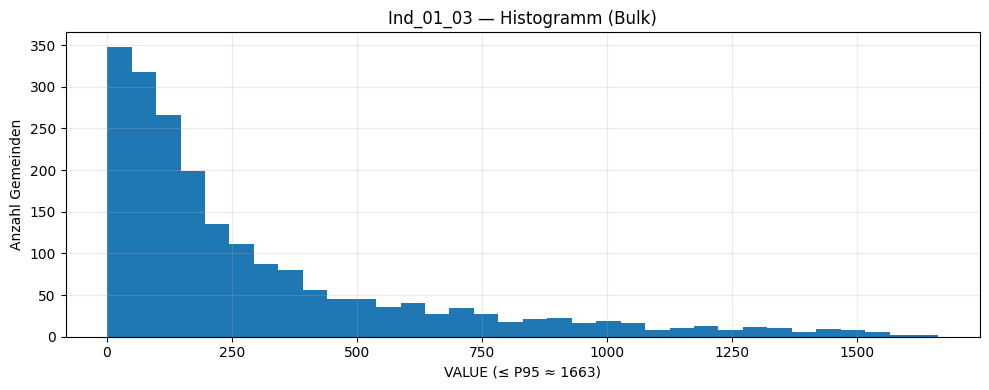

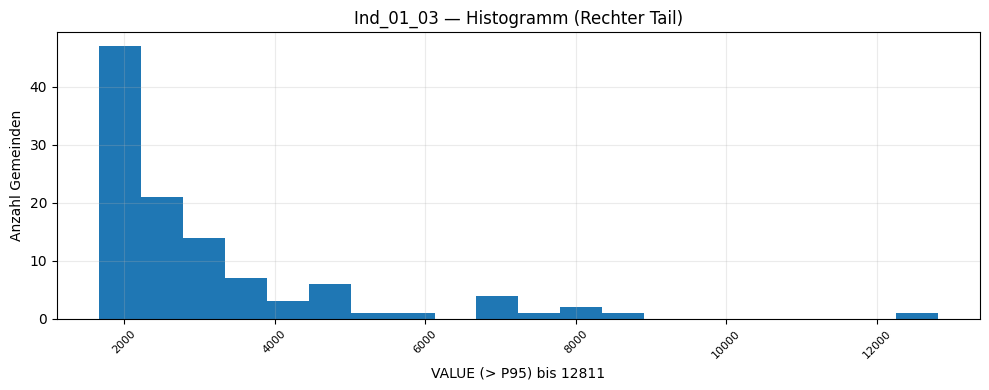

In [142]:
vals = df_01_03["VALUE_num"].dropna().values
p95 = np.percentile(vals, 95)
left = vals[vals <= p95]
right = vals[vals > p95]

if len(left) < 2:
    bins_left = 5
else:
    q1_left, q3_left = np.percentile(left, [25, 75])
    iqr_left = q3_left - q1_left
    if iqr_left == 0:
        bins_left = int(np.clip(np.ceil(np.log2(len(left)) + 1), 5, 50))
    else:
        h_left = 2 * iqr_left * (len(left) ** (-1/3))
        bins_left = int(np.clip(np.ceil((left.max() - left.min()) / h_left), 5, 50))

if len(right) < 2:
    bins_right = 5
else:
    q1_right, q3_right = np.percentile(right, [25, 75])
    iqr_right = q3_right - q1_right
    if iqr_right == 0:
        bins_right = int(np.clip(np.ceil(np.log2(len(right)) + 1), 5, 50))
    else:
        h_right = 2 * iqr_right * (len(right) ** (-1/3))
        bins_right = int(np.clip(np.ceil((right.max() - right.min()) / h_right), 5, 50))

fig1, ax1 = plt.subplots(figsize=(10, 4))
ax1.hist(left, bins=bins_left)
ax1.set_xlabel(f"VALUE (≤ P95 ≈ {p95:.0f})")
ax1.set_ylabel("Anzahl Gemeinden")
ax1.set_title("Ind_01_03 — Histogramm (Bulk)")
ax1.grid(alpha=0.25)
ax1.xaxis.set_major_locator(MaxNLocator(nbins=8, prune="both"))
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(figsize=(10, 4))
if len(right) > 0:
    ax2.hist(right, bins=bins_right)
ax2.set_xlabel(f"VALUE (> P95) bis {vals.max():.0f}")
ax2.set_ylabel("Anzahl Gemeinden")
ax2.set_title("Ind_01_03 — Histogramm (Rechter Tail)")
ax2.grid(alpha=0.25)
ax2.xaxis.set_major_locator(MaxNLocator(nbins=8, prune="both"))
ax2.tick_params(axis="x", labelsize=8, rotation=45)
plt.tight_layout()
plt.show()

In [143]:
df_01_03.describe()

,VALUE,VALUE_num
count,2172.000000,2172.000000
mean,437.699943,437.699943
std,792.790575,792.790575
min,0.860165,0.860165
25%,80.634980,80.634980
50%,184.991670,184.991670
75%,466.868224,466.868224
max,12810.992460,12810.992460


## Ind_06_03: Anzahl Beschäftigte absolut

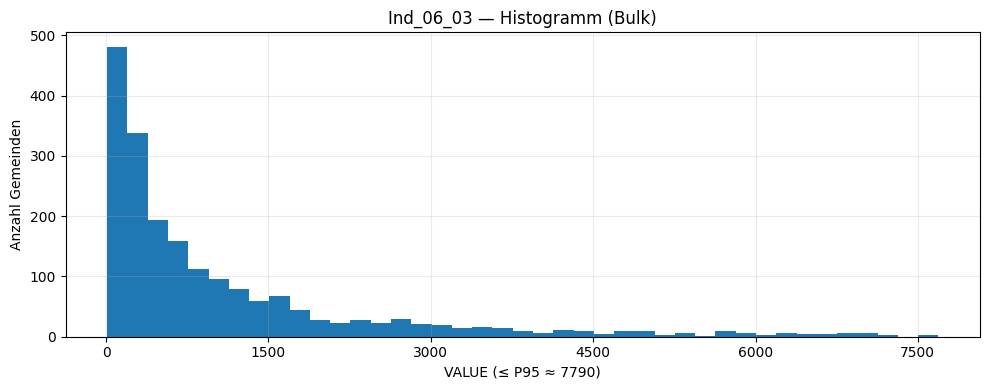

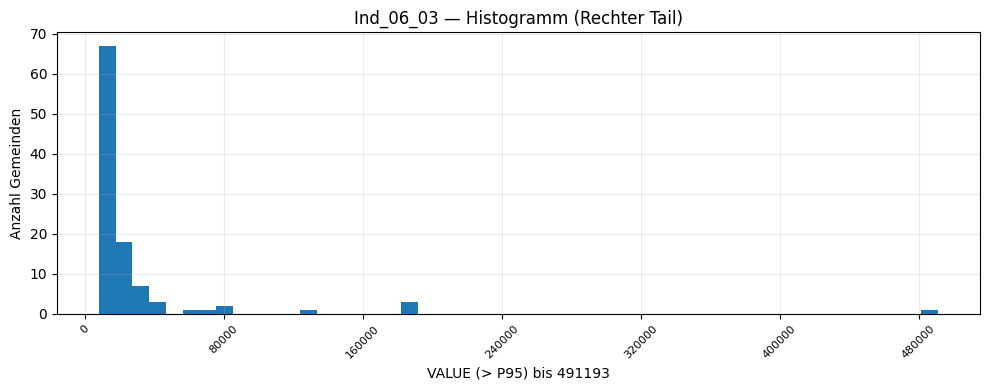

In [144]:
vals = df_06_03["VALUE_num"].dropna().values
p95 = np.percentile(vals, 95)
left = vals[vals <= p95]
right = vals[vals > p95]

if len(left) < 2:
    bins_left = 5
else:
    q1_left, q3_left = np.percentile(left, [25, 75])
    iqr_left = q3_left - q1_left
    if iqr_left == 0:
        bins_left = int(np.clip(np.ceil(np.log2(len(left)) + 1), 5, 50))
    else:
        h_left = 2 * iqr_left * (len(left) ** (-1/3))
        bins_left = int(np.clip(np.ceil((left.max() - left.min()) / h_left), 5, 50))

if len(right) < 2:
    bins_right = 5
else:
    q1_right, q3_right = np.percentile(right, [25, 75])
    iqr_right = q3_right - q1_right
    if iqr_right == 0:
        bins_right = int(np.clip(np.ceil(np.log2(len(right)) + 1), 5, 50))
    else:
        h_right = 2 * iqr_right * (len(right) ** (-1/3))
        bins_right = int(np.clip(np.ceil((right.max() - right.min()) / h_right), 5, 50))

fig1, ax1 = plt.subplots(figsize=(10, 4))
ax1.hist(left, bins=bins_left)
ax1.set_xlabel(f"VALUE (≤ P95 ≈ {p95:.0f})")
ax1.set_ylabel("Anzahl Gemeinden")
ax1.set_title("Ind_06_03 — Histogramm (Bulk)")
ax1.grid(alpha=0.25)
ax1.xaxis.set_major_locator(MaxNLocator(nbins=8, prune="both"))
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(figsize=(10, 4))
if len(right) > 0:
    ax2.hist(right, bins=bins_right)
ax2.set_xlabel(f"VALUE (> P95) bis {vals.max():.0f}")
ax2.set_ylabel("Anzahl Gemeinden")
ax2.set_title("Ind_06_03 — Histogramm (Rechter Tail)")
ax2.grid(alpha=0.25)
ax2.xaxis.set_major_locator(MaxNLocator(nbins=8, prune="both"))
ax2.tick_params(axis="x", labelsize=8, rotation=45)
plt.tight_layout()
plt.show()


In [145]:
df_06_03.describe()

,VALUE,VALUE_num
count,2076.000000,2076.000000
mean,2498.994701,2498.994701
std,14026.548188,14026.548188
min,11.000000,11.000000
25%,215.000000,215.000000
50%,598.000000,598.000000
75%,1620.000000,1620.000000
max,491193.000000,491193.000000


## Ind_06_07: Anzahl Arbeitsstätten absolut

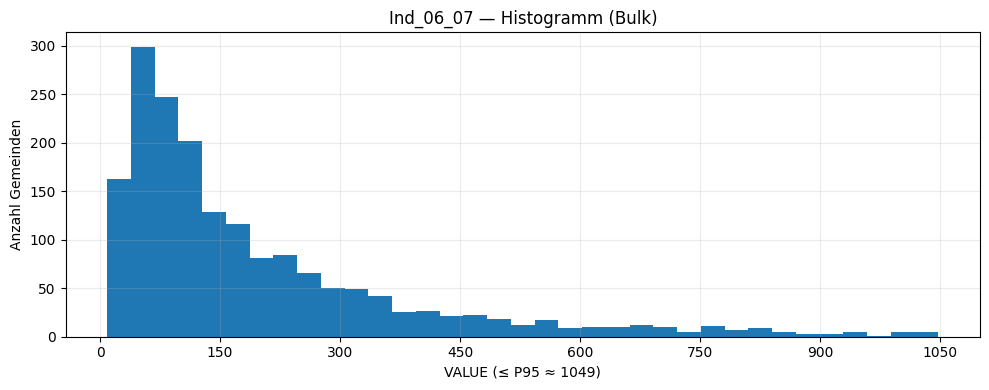

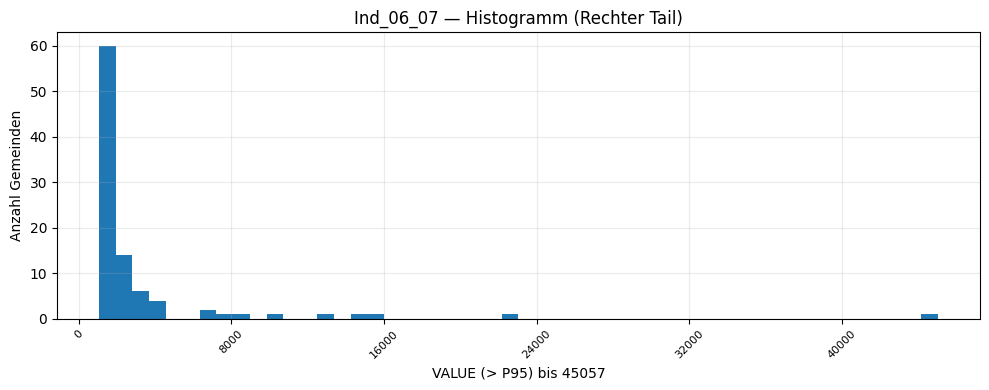

In [146]:
vals = df_06_07["VALUE_num"].dropna().values
p95 = np.percentile(vals, 95)
left = vals[vals <= p95]
right = vals[vals > p95]

if len(left) < 2:
    bins_left = 5
else:
    q1_left, q3_left = np.percentile(left, [25, 75])
    iqr_left = q3_left - q1_left
    if iqr_left == 0:
        bins_left = int(np.clip(np.ceil(np.log2(len(left)) + 1), 5, 50))
    else:
        h_left = 2 * iqr_left * (len(left) ** (-1/3))
        bins_left = int(np.clip(np.ceil((left.max() - left.min()) / h_left), 5, 50))

if len(right) < 2:
    bins_right = 5
else:
    q1_right, q3_right = np.percentile(right, [25, 75])
    iqr_right = q3_right - q1_right
    if iqr_right == 0:
        bins_right = int(np.clip(np.ceil(np.log2(len(right)) + 1), 5, 50))
    else:
        h_right = 2 * iqr_right * (len(right) ** (-1/3))
        bins_right = int(np.clip(np.ceil((right.max() - right.min()) / h_right), 5, 50))

fig1, ax1 = plt.subplots(figsize=(10, 4))
ax1.hist(left, bins=bins_left)
ax1.set_xlabel(f"VALUE (≤ P95 ≈ {p95:.0f})")
ax1.set_ylabel("Anzahl Gemeinden")
ax1.set_title("Ind_06_07 — Histogramm (Bulk)")
ax1.grid(alpha=0.25)
ax1.xaxis.set_major_locator(MaxNLocator(nbins=8, prune="both"))
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(figsize=(10, 4))
if len(right) > 0:
    ax2.hist(right, bins=bins_right)
ax2.set_xlabel(f"VALUE (> P95) bis {vals.max():.0f}")
ax2.set_ylabel("Anzahl Gemeinden")
ax2.set_title("Ind_06_07 — Histogramm (Rechter Tail)")
ax2.grid(alpha=0.25)
ax2.xaxis.set_major_locator(MaxNLocator(nbins=8, prune="both"))
ax2.tick_params(axis="x", labelsize=8, rotation=45)
plt.tight_layout()

In [147]:
df_06_07.describe()

,VALUE,VALUE_num
count,1875.000000,1875.000000
mean,346.909867,346.909867
std,1411.799868,1411.799868
min,9.000000,9.000000
25%,69.000000,69.000000
50%,133.000000,133.000000
75%,287.500000,287.500000
max,45057.000000,45057.000000


# Transformation

## Ind_01_01: Bevölkerung absolut

### log-abstandsbasierte (geometrische) Klassen

In [148]:
# Ausgangspunkt: df_01_01 mit VALUE_num existiert bereits (wie in deinem Notebook)

# --- 1) Basiswerte bestimmen (nur >0 für Log-Abstände) ---
vals_all = df_01_01["VALUE_num"].dropna().values
vals_pos = vals_all[vals_all > 0]

lower = vals_pos.min()
upper_p = 97.5  # Top-Coding-Schwelle (änderbar: 97.5, 99.5, ...)
upper = np.percentile(vals_pos, upper_p)
real_max = vals_pos.max()

# --- 2) Geometrisch (log-abstands-) verteilte Kanten zwischen lower und P99, dann P99–max als letzte Klasse ---
# 5 Klassen => 6 Kanten. Wir nehmen 5 Kanten via Geomspace bis P99 und setzen die 6. Kante auf real_max.
edges_geom = np.geomspace(lower, upper, num=6)              # 6 Kanten: min..P99
edges = np.concatenate([edges_geom[:-1], [real_max]])       # letzte Kante = Max

# --- 3) "Schöne" Kanten runden (1–2–5 × 10^k) für lesbare Grenzen ---
edges_rounded = []
for x in edges:
    if x <= 0:
        edges_rounded.append(0.0)
    else:
        exp = np.floor(np.log10(x))
        base = 10 ** exp
        mant = x / base
        if mant < 1.5:
            nice = 1 * base
        elif mant < 3.5:
            nice = 2 * base
        elif mant < 7.5:
            nice = 5 * base
        else:
            nice = 10 * base
        edges_rounded.append(float(nice))

# sicherstellen, dass Kanten streng ansteigen (keine Duplikate nach Rundung)
edges_sorted = np.array(edges_rounded, dtype=float)
for i in range(1, len(edges_sorted)):
    if edges_sorted[i] <= edges_sorted[i-1]:
        edges_sorted[i] = np.nextafter(edges_sorted[i-1], np.inf)

# --- 4) Labels bauen (mit Tausendertrennung) ---
def fmt(x): 
    return f"{int(round(x)):,}".replace(",", " ")  # schmales Leerzeichen als Tausender

labels = [
    f"[{fmt(edges_sorted[i])}, {fmt(edges_sorted[i+1])})" if i < len(edges_sorted)-2
    else f"[{fmt(edges_sorted[i])}, {fmt(edges_sorted[i+1])}]"
    for i in range(len(edges_sorted)-1)
]

# --- 5) 5 Klassen zuweisen (1..5) + Punkte (hier: höhere Werte => mehr Punkte) ---
df_01_01["CLASS5"] = pd.cut(
    df_01_01["VALUE_num"],
    bins=edges_sorted,
    include_lowest=True,
    right=True,
    labels=[1, 2, 3, 4, 5]
).astype("Int64")

# Punkte (falls niedriger besser sein soll, einfach 6 - CLASS5 nehmen)
df_01_01["POINTS"] = df_01_01["CLASS5"]

# --- 6) Übersicht: Kanten & Häufigkeiten je Klasse ---
print("Klassengrenzen (gerundet):")
for i in range(5):
    print(f"Klasse {i+1}: {labels[i]}")

freq = df_01_01["CLASS5"].value_counts(dropna=False).sort_index()
display(freq.rename("n").to_frame())

# --- 7) Beispiel: Referenzwert klassifizieren (z. B. 4'500) ---
ref_value = 4500
ref_class = pd.cut(
    pd.Series([ref_value]),
    bins=edges_sorted, include_lowest=True, right=True, labels=[1,2,3,4,5]
).iloc[0]
ref_points = int(ref_class) if pd.notna(ref_class) else None
print(f"Referenzwert {ref_value:,} → Klasse {ref_points} ({labels[int(ref_points)-1]})".replace(",", " "))


Klassengrenzen (gerundet):
Klasse 1: [20, 100)
Klasse 2: [100, 500)
Klasse 3: [500, 1 000)
Klasse 4: [1 000, 5 000)
Klasse 5: [5 000, 500 000]


,n
CLASS5,
1,26
2,340
3,380
4,1028
5,398


Referenzwert 4 500 → Klasse 4 ([1 000  5 000))


### Equal-Frequency (gleiche Fallzahlen pro Klasse)

In [149]:
# Ausgangspunkt: df_01_01 existiert bereits mit numerischem df_01_01["VALUE_num"]
import numpy as np
import pandas as pd

# 1) Nur positive Werte für die Log-Quantile (0 separat in die erste Klasse packen)
mask_pos = df_01_01["VALUE_num"] > 0
vals_pos = df_01_01.loc[mask_pos, "VALUE_num"].dropna().values

# 2) Quintile der LOG-Werte (≈ gleich viele Beobachtungen pro Klasse)
q_log = np.percentile(np.log(vals_pos), [0, 20, 40, 60, 80, 100])  # 6 Kanten für 5 Klassen

# 3) Grenzen zurück auf Originalskala
edges = np.exp(q_log)

# 4) Untere Kante auf 0 setzen (damit auch 0er reinfallen); Monotonie sicherstellen
edges[0] = 0.0
for i in range(1, len(edges)):
    if edges[i] <= edges[i-1]:
        edges[i] = np.nextafter(edges[i-1], np.inf)

# 5) (Optional) „schöne“ Grenzen runden (1–2–5 × 10^k); bei Rundungs-Kollision minimal anheben
edges_rounded = edges.copy()
for i, x in enumerate(edges_rounded):
    if x <= 0:
        continue
    exp10 = np.floor(np.log10(x))
    base = 10 ** exp10
    mant = x / base
    if mant < 1.5: nice = 1*base
    elif mant < 3.5: nice = 2*base
    elif mant < 7.5: nice = 5*base
    else: nice = 10*base
    edges_rounded[i] = float(nice)
for i in range(1, len(edges_rounded)):
    if edges_rounded[i] <= edges_rounded[i-1]:
        edges_rounded[i] = np.nextafter(edges_rounded[i-1], np.inf)

# 6) Labels (Originalwerte, Tausendertrennung)
def fmt(x): return f"{int(round(x)):,}".replace(",", " ")
labels = [
    f"[{fmt(edges_rounded[i])}, {fmt(edges_rounded[i+1])})" if i < len(edges_rounded)-2
    else f"[{fmt(edges_rounded[i])}, {fmt(edges_rounded[i+1])}]"
    for i in range(len(edges_rounded)-1)
]

# 7) Klassen & Punkte zuweisen (höher = mehr Punkte; falls „niedriger besser“ -> 6 - CLASS5)
df_01_01["CLASS5"] = pd.cut(
    df_01_01["VALUE_num"],
    bins=edges_rounded,
    include_lowest=True,
    right=True,
    labels=[1,2,3,4,5]
).astype("Int64")
df_01_01["POINTS"] = df_01_01["CLASS5"]  # oder: 6 - df_01_01["CLASS5"]

# 8) Kontrolle: Häufigkeiten pro Klasse und Grenzen ausgeben
display(df_01_01["CLASS5"].value_counts(dropna=False).sort_index().rename("n").to_frame())
print("Klassengrenzen (Originalwerte):")
for i in range(5):
    print(f"Klasse {i+1}: {labels[i]}")


,n
CLASS5,
1,366
2,380
3,493
4,535
5,398


Klassengrenzen (Originalwerte):
Klasse 1: [0, 500)
Klasse 2: [500, 1 000)
Klasse 3: [1 000, 2 000)
Klasse 4: [2 000, 5 000)
Klasse 5: [5 000, 500 000]


## Ind_01_03: Bevölkerungsdichte

### log-abstandsbasierte (geometrische) Klassen

In [150]:
# --- Ind_01_03: Basiswerte (nur >0) ---
vals_all = df_01_03["VALUE_num"].dropna().values
vals_pos = vals_all[vals_all > 0]

lower = vals_pos.min()
upper_p = 97.5
upper = np.percentile(vals_pos, upper_p)
real_max = vals_pos.max()

# --- Geomspace-Kanten min..P97.5, letzte Kante = Max ---
edges_geom = np.geomspace(lower, upper, num=6)
edges = np.concatenate([edges_geom[:-1], [real_max]])

# --- "Schöne" 1-2-5-Grenzen + Monotonie sichern ---
edges_rounded = []
for x in edges:
    if x <= 0:
        edges_rounded.append(0.0)
    else:
        exp = np.floor(np.log10(x))
        base = 10 ** exp
        mant = x / base
        if mant < 1.5: nice = 1*base
        elif mant < 3.5: nice = 2*base
        elif mant < 7.5: nice = 5*base
        else: nice = 10*base
        edges_rounded.append(float(nice))
edges_sorted = np.array(edges_rounded, dtype=float)
for i in range(1, len(edges_sorted)):
    if edges_sorted[i] <= edges_sorted[i-1]:
        edges_sorted[i] = np.nextafter(edges_sorted[i-1], np.inf)

# --- Labels ---
labels_01_03 = [
    f"[{int(round(edges_sorted[i])):,} , {int(round(edges_sorted[i+1])):,})".replace(",", " ")
    if i < len(edges_sorted)-2 else
    f"[{int(round(edges_sorted[i])):,} , {int(round(edges_sorted[i+1])):,}]".replace(",", " ")
    for i in range(len(edges_sorted)-1)
]

# --- Klassen + Punkte ---
df_01_03["CLASS5"] = pd.cut(
    df_01_03["VALUE_num"],
    bins=edges_sorted, include_lowest=True, right=True,
    labels=[1,2,3,4,5]
).astype("Int64")
df_01_03["POINTS"] = df_01_03["CLASS5"]

print("Ind_01_03 — Klassengrenzen (gerundet):")
for i in range(5):
    print(f"Klasse {i+1}: {labels_01_03[i]}")
display(df_01_03["CLASS5"].value_counts(dropna=False).sort_index().rename("n").to_frame())


Ind_01_03 — Klassengrenzen (gerundet):
Klasse 1: [1   5)
Klasse 2: [5   20)
Klasse 3: [20   100)
Klasse 4: [100   500)
Klasse 5: [500   10 000]


,n
CLASS5,
1,31
2,106
3,538
4,978
5,517
<NA>,2


### Equal-Frequency (gleiche Fallzahlen pro Klasse)

In [151]:
# Quintile der LOG-Werte -> zurück auf Originalskala
mask_pos = df_01_03["VALUE_num"] > 0
vals_pos = df_01_03.loc[mask_pos, "VALUE_num"].dropna().values
q_log = np.percentile(np.log(vals_pos), [0,20,40,60,80,100])
edges_q = np.exp(q_log)
edges_q[0] = 0.0
for i in range(1, len(edges_q)):
    if edges_q[i] <= edges_q[i-1]:
        edges_q[i] = np.nextafter(edges_q[i-1], np.inf)

# optionale 1-2-5-Rundung
edges_qr = edges_q.copy()
for i, x in enumerate(edges_qr):
    if x <= 0: continue
    exp10 = np.floor(np.log10(x)); base = 10**exp10; mant = x/base
    if mant < 1.5: nice = 1*base
    elif mant < 3.5: nice = 2*base
    elif mant < 7.5: nice = 5*base
    else: nice = 10*base
    edges_qr[i] = float(nice)
for i in range(1, len(edges_qr)):
    if edges_qr[i] <= edges_qr[i-1]:
        edges_qr[i] = np.nextafter(edges_qr[i-1], np.inf)

df_01_03["CLASS5_QLOG"] = pd.cut(
    df_01_03["VALUE_num"],
    bins=edges_qr, include_lowest=True, right=True,
    labels=[1,2,3,4,5]
).astype("Int64")
df_01_03["POINTS_QLOG"] = df_01_03["CLASS5_QLOG"]
display(df_01_03["CLASS5_QLOG"].value_counts(dropna=False).sort_index().rename("n").to_frame())


,n
CLASS5_QLOG,
1,349
2,327
3,469
4,509
5,517
<NA>,1


## Ind_06_03: Anzahl Beschäftigte absolut

### log-abstandsbasierte (geometrische) Klassen

In [152]:
# --- Ind_06_03: Basiswerte (nur >0) ---
vals_all = df_06_03["VALUE_num"].dropna().values
vals_pos = vals_all[vals_all > 0]

lower = vals_pos.min()
upper_p = 97.5
upper = np.percentile(vals_pos, upper_p)
real_max = vals_pos.max()

edges_geom = np.geomspace(lower, upper, num=6)
edges = np.concatenate([edges_geom[:-1], [real_max]])

edges_rounded = []
for x in edges:
    if x <= 0:
        edges_rounded.append(0.0)
    else:
        exp = np.floor(np.log10(x)); base = 10**exp; mant = x/base
        if mant < 1.5: nice = 1*base
        elif mant < 3.5: nice = 2*base
        elif mant < 7.5: nice = 5*base
        else: nice = 10*base
        edges_rounded.append(float(nice))
edges_sorted = np.array(edges_rounded, dtype=float)
for i in range(1, len(edges_sorted)):
    if edges_sorted[i] <= edges_sorted[i-1]:
        edges_sorted[i] = np.nextafter(edges_sorted[i-1], np.inf)

labels_06_03 = [
    f"[{int(round(edges_sorted[i])):,} , {int(round(edges_sorted[i+1])):,})".replace(",", " ")
    if i < len(edges_sorted)-2 else
    f"[{int(round(edges_sorted[i])):,} , {int(round(edges_sorted[i+1])):,}]".replace(",", " ")
    for i in range(len(edges_sorted)-1)
]

df_06_03["CLASS5"] = pd.cut(
    df_06_03["VALUE_num"],
    bins=edges_sorted, include_lowest=True, right=True,
    labels=[1,2,3,4,5]
).astype("Int64")
df_06_03["POINTS"] = df_06_03["CLASS5"]

print("Ind_06_03 — Klassengrenzen (gerundet):")
for i in range(5):
    print(f"Klasse {i+1}: {labels_06_03[i]}")
display(df_06_03["CLASS5"].value_counts(dropna=False).sort_index().rename("n").to_frame())


Ind_06_03 — Klassengrenzen (gerundet):
Klasse 1: [10   50)
Klasse 2: [50   200)
Klasse 3: [200   1 000)
Klasse 4: [1 000   2 000)
Klasse 5: [2 000   500 000]


,n
CLASS5,
1,58
2,425
3,831
4,330
5,432
<NA>,96


### Equal-Frequency (gleiche Fallzahlen pro Klasse)

In [153]:
mask_pos = df_06_03["VALUE_num"] > 0
vals_pos = df_06_03.loc[mask_pos, "VALUE_num"].dropna().values
q_log = np.percentile(np.log(vals_pos), [0,20,40,60,80,100])
edges_q = np.exp(q_log)
edges_q[0] = 0.0
for i in range(1, len(edges_q)):
    if edges_q[i] <= edges_q[i-1]:
        edges_q[i] = np.nextafter(edges_q[i-1], np.inf)

edges_qr = edges_q.copy()
for i, x in enumerate(edges_qr):
    if x <= 0: continue
    exp10 = np.floor(np.log10(x)); base = 10**exp10; mant = x/base
    if mant < 1.5: nice = 1*base
    elif mant < 3.5: nice = 2*base
    elif mant < 7.5: nice = 5*base
    else: nice = 10*base
    edges_qr[i] = float(nice)
for i in range(1, len(edges_qr)):
    if edges_qr[i] <= edges_qr[i-1]:
        edges_qr[i] = np.nextafter(edges_qr[i-1], np.inf)

df_06_03["CLASS5_QLOG"] = pd.cut(
    df_06_03["VALUE_num"],
    bins=edges_qr, include_lowest=True, right=True,
    labels=[1,2,3,4,5]
).astype("Int64")
df_06_03["POINTS_QLOG"] = df_06_03["CLASS5_QLOG"]
display(df_06_03["CLASS5_QLOG"].value_counts(dropna=False).sort_index().rename("n").to_frame())


,n
CLASS5_QLOG,
1,483
2,474
3,357
4,330
5,432
<NA>,96


## Ind_06_07: Anzahl Arbeitsstätten absolut

### log-abstandsbasierte (geometrische) Klassen

In [154]:
# --- Ind_06_07: Basiswerte (nur >0) ---
vals_all = df_06_07["VALUE_num"].dropna().values
vals_pos = vals_all[vals_all > 0]

lower = vals_pos.min()
upper_p = 97.5
upper = np.percentile(vals_pos, upper_p)
real_max = vals_pos.max()

edges_geom = np.geomspace(lower, upper, num=6)
edges = np.concatenate([edges_geom[:-1], [real_max]])

edges_rounded = []
for x in edges:
    if x <= 0:
        edges_rounded.append(0.0)
    else:
        exp = np.floor(np.log10(x)); base = 10**exp; mant = x/base
        if mant < 1.5: nice = 1*base
        elif mant < 3.5: nice = 2*base
        elif mant < 7.5: nice = 5*base
        else: nice = 10*base
        edges_rounded.append(float(nice))
edges_sorted = np.array(edges_rounded, dtype=float)
for i in range(1, len(edges_sorted)):
    if edges_sorted[i] <= edges_sorted[i-1]:
        edges_sorted[i] = np.nextafter(edges_sorted[i-1], np.inf)

labels_06_07 = [
    f"[{int(round(edges_sorted[i])):,} , {int(round(edges_sorted[i+1])):,})".replace(",", " ")
    if i < len(edges_sorted)-2 else
    f"[{int(round(edges_sorted[i])):,} , {int(round(edges_sorted[i+1])):,}]".replace(",", " ")
    for i in range(len(edges_sorted)-1)
]

df_06_07["CLASS5"] = pd.cut(
    df_06_07["VALUE_num"],
    bins=edges_sorted, include_lowest=True, right=True,
    labels=[1,2,3,4,5]
).astype("Int64")
df_06_07["POINTS"] = df_06_07["CLASS5"]

print("Ind_06_07 — Klassengrenzen (gerundet):")
for i in range(5):
    print(f"Klasse {i+1}: {labels_06_07[i]}")
display(df_06_07["CLASS5"].value_counts(dropna=False).sort_index().rename("n").to_frame())


Ind_06_07 — Klassengrenzen (gerundet):
Klasse 1: [10   20)
Klasse 2: [20   50)
Klasse 3: [50   200)
Klasse 4: [200   500)
Klasse 5: [500   50 000]


,n
CLASS5,
1,21
2,259
3,912
4,441
5,240
<NA>,299


### Equal-Frequency (gleiche Fallzahlen pro Klasse)

In [155]:
mask_pos = df_06_07["VALUE_num"] > 0
vals_pos = df_06_07.loc[mask_pos, "VALUE_num"].dropna().values
q_log = np.percentile(np.log(vals_pos), [0,20,40,60,80,100])
edges_q = np.exp(q_log)
edges_q[0] = 0.0
for i in range(1, len(edges_q)):
    if edges_q[i] <= edges_q[i-1]:
        edges_q[i] = np.nextafter(edges_q[i-1], np.inf)

edges_qr = edges_q.copy()
for i, x in enumerate(edges_qr):
    if x <= 0: continue
    exp10 = np.floor(np.log10(x)); base = 10**exp10; mant = x/base
    if mant < 1.5: nice = 1*base
    elif mant < 3.5: nice = 2*base
    elif mant < 7.5: nice = 5*base
    else: nice = 10*base
    edges_qr[i] = float(nice)
for i in range(1, len(edges_qr)):
    if edges_qr[i] <= edges_qr[i-1]:
        edges_qr[i] = np.nextafter(edges_qr[i-1], np.inf)

df_06_07["CLASS5_QLOG"] = pd.cut(
    df_06_07["VALUE_num"],
    bins=edges_qr, include_lowest=True, right=True,
    labels=[1,2,3,4,5]
).astype("Int64")
df_06_07["POINTS_QLOG"] = df_06_07["CLASS5_QLOG"]
display(df_06_07["CLASS5_QLOG"].value_counts(dropna=False).sort_index().rename("n").to_frame())


,n
CLASS5_QLOG,
1,282
2,442
3,470
5,681
<NA>,297
